In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kartakusumakk","key":"445e71c6dd76e03c47943771bd9369ee"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

 79% 37.0M/47.0M [00:00<00:00, 134MB/s] 
100% 47.0M/47.0M [00:00<00:00, 116MB/s]


In [5]:
!mkdir dataset
!unzip -qq shoe-vs-sandal-vs-boot-dataset-15k-images.zip -d dataset
!ls dataset

'Shoe vs Sandal vs Boot Dataset'


In [6]:
!ls 'dataset/Shoe vs Sandal vs Boot Dataset'

Boot  Sandal  Shoe


In [7]:
import os

dataset = os.path.join('/content/dataset/Shoe vs Sandal vs Boot Dataset')
print(os.listdir(dataset))

['Boot', 'Sandal', 'Shoe']


In [8]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import splitfolders

foot_wear = '/content/foot_wear'
splitfolders.ratio(dataset, output=foot_wear, seed=1337, ratio=(0.8, 0.2))

Copying files: 15000 files [00:03, 4189.37 files/s]


In [10]:
train_dir = os.path.join(foot_wear, 'train')
val_dir = os.path.join(foot_wear, 'val')

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255
)

In [12]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical'
)

val_data = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical'
)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [15]:
val_stop = 0.90

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > val_stop and logs.get('val_accuracy') > val_stop):
      print('\nAccuray mencapai ~90%, training diakhiri!')
      self.model.stop_training = True

callback = myCallback()

In [16]:
num_epochs = 40
history = model.fit(
    train_data,
    steps_per_epoch=25,
    epochs=num_epochs,
    validation_data=val_data,
    validation_steps=5,
    verbose=2,
    callbacks=[callback]
)

Epoch 1/40
25/25 - 230s - loss: 1.0515 - accuracy: 0.4476 - val_loss: 0.8585 - val_accuracy: 0.6406 - 230s/epoch - 9s/step
Epoch 2/40
25/25 - 214s - loss: 0.9284 - accuracy: 0.5378 - val_loss: 0.7162 - val_accuracy: 0.6797 - 214s/epoch - 9s/step
Epoch 3/40
25/25 - 216s - loss: 0.8647 - accuracy: 0.5844 - val_loss: 0.6883 - val_accuracy: 0.7094 - 216s/epoch - 9s/step
Epoch 4/40
25/25 - 224s - loss: 0.8208 - accuracy: 0.6172 - val_loss: 0.6590 - val_accuracy: 0.7063 - 224s/epoch - 9s/step
Epoch 5/40
25/25 - 213s - loss: 0.7980 - accuracy: 0.6356 - val_loss: 0.6298 - val_accuracy: 0.7203 - 213s/epoch - 9s/step
Epoch 6/40
25/25 - 212s - loss: 0.7770 - accuracy: 0.6531 - val_loss: 0.6525 - val_accuracy: 0.6969 - 212s/epoch - 8s/step
Epoch 7/40
25/25 - 215s - loss: 0.7254 - accuracy: 0.6734 - val_loss: 0.6013 - val_accuracy: 0.7656 - 215s/epoch - 9s/step
Epoch 8/40
25/25 - 216s - loss: 0.6979 - accuracy: 0.6819 - val_loss: 0.6091 - val_accuracy: 0.7391 - 216s/epoch - 9s/step
Epoch 9/40
25/25

In [17]:
import matplotlib.pyplot as plt
import numpy as np

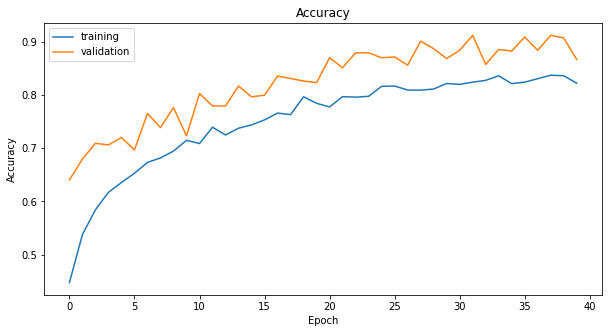

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), history.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), history.history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

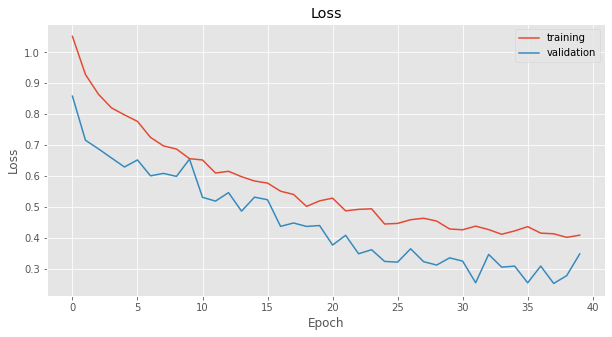

In [19]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), history.history["loss"], label="training")
plt.plot(np.arange(0, num_epochs), history.history["val_loss"], label="validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [20]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

In [21]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [22]:
import pathlib

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

54127392